In [87]:
import os
import sys
import re
import string
import datetime
import time
import numpy as np
import matplotlib as mptl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
from numpy import *
from datetime import timedelta
from datetime import datetime
from matplotlib.pyplot import grid, figure, plot, savefig
from time import gmtime, strftime
import pandas as pd
import math
from pykalman import KalmanFilter
#END OF HEADER

In [88]:
# net probelov v imenah SVS
timeArr=[]
arrF=[]
arrS=[]
arrSvs=[]
test=[]
count_time_svs = 0
filename =   os.path.basename('TPKL1681.22O')
#filename =   os.path.basename('POLY0502a.20o')#  L1    L2    C1    P1    P2    S1    S2
#filename =   os.path.basename('POLY0503a.20o')#  L1    L2    C1    P1    P2    S1    S2
#filename =   os.path.basename('POLY0501a.20o')#  L1    L2    C1    P1    P2    S1    S2
#filename =   os.path.basename('POLY0501a.20o')#  L1    L2    C1    P1    P2    S1    S2


#print(filename1)
file1 = open (filename)
allLines = file1.readlines()
file1linecount = len(allLines)
file1.seek(0) # peremestit ukozatel v nachal

for ln in range(file1linecount) :#3700 strok все строки
    # read equivalent lines from 2 or 3 files, at index ln (line number); 0 base
    line  = file1.readline()
    #print(line)
    #line  = file1.readline()
   
    #re.findall(r'G..|R..', param)END OF HEADER
    #\s\d\d\s\s\d\s\s\d\s...........
  
    if ln==11:
        times = (line[4:24])
        #print(times)# 20     5     1     0
        times=times.replace("    ", " ")
        times=times.replace("   ", " ")
        times=times.replace("  ", " ")
        times = times.replace(" ", " ")
        times=times.strip()
        times= times.split(" ")
        #print(times)
        timeArr = times
    if ln >= 17 :
        param=line.strip() #str
        
        #print(ln , line)
#        print('-------------------------')

        #print(paramtimeSvs = np.array(timeSvs,dtype=object))
    #    r = re.split(r'G', line)
        #print(ln , param)                        #G28G17G12G24G 6G 2
        result = re.findall(r'G..|R..', param)# ищим G любые симв и R люб символы        # type list
        vremya = re.findall(r'\d\d\s\s\d\s\s\d\s.', param)# ищим G любые симв и R люб символы        # type list
    
        if vremya :
            #print(ln , vremya)
            count_time_svs += 1
            
       

        if result :  #
            #result = re.sub('\s', '', result)# est probeli 
            #print(ln , result)
            arrSvs.append(result)
            #[['G16', 'G23', 'G06', 'G09', 'G04', 'G22', 'G03', 'G26', 'G14', 'G31'], 
            #['G16', 'G02]]
           
        else:
            #109723767.5854 8  85499045.2474 7    109723767.58548  85499045.24747      type STR
            res = re.sub('\s\w\s', '*', param)#zamena otshipaih jstatkov na 7
            #res = re.sub(';\w','7',res)
            res=res.replace(' ',"_")
            res = re.sub('\d_\d', '7' , res)# rab
            res=res.replace('*','____')
            #res=res.replace(';\w ',"")
            #print(param)
            #print(ln , ' ',res)
            #res=res.replace(';;;;;;;;;;;;;;;;;;',';NaN;')
            res=res.replace('________','_')
            res=res.replace('_____','_')
            res=res.replace('____','_')
            res=res.replace('__','_')
            res=res.replace('__','_')
            #print(res)
            #print(ln , ' ',res)
            res= res.split("_")  #          Type list
            #print(ln , ' ',res)
            #param = list(map(float, param))
            #print(ln)
            
            #arrSvs.append(result)
            test.append(res)    # Скидывает все данные где нет имен спутников
#print(len(test))          
#len(arrSvs) 
#print(count_time_svs)
#test

In [89]:
#print(len(arrSvs))
#print(len(test))
voln=[]
voln2=[]
SVS=[]
#Во всех данных test нечетные строки 5 парам и четные 2 парам
for x in range(len(test)):# chetni stroki popadat 5 parametrov(L1,L2,C,P2) eshe 2 poslednie 2 parametra s1 s2 signal shum
    if x%2==0:
        #print(x,' ',test[x])
        #if len(test[x])<4:
        #    flash2.append(x)
        if len(test[x])==4:
            #flash4.append(x)
            test[x].append('NaN')
        if len(test[x])==3:
            #flash4.append(x)
            test[x].append('NaN')
            test[x].append('NaN')
        if len(test[x])==2:
            #flash4.append(x)
            test[x].append('NaN')
            test[x].append('NaN') 
            test[x].append('NaN')
        if len(test[x])==1:
            #flash4.append(x)
            test[x].append('NaN')
            test[x].append('NaN') 
            test[x].append('NaN')   
            test[x].append('NaN') 
       # print(x)
       # print('chet ',len(test[x]))
      #  print('chet ',test[x])
        voln.append(test[x])
    elif x%2!=0:# chetni stroki popadat 2 parametrov(S1,S2) eshe 2 poslednie 2 parametra s1 s2 signal shum
##    else:
        #print(test[x])
        if len(test[x])==1:
            #flash.append(x)
#            print(test[x])
            test[x]=['NaN','NaN']
#        if len(test[x])==0:
            #flash.append(x)
            #print(x)
#            test[x].append('NaN')    
#            test[x].append('NaN')
       # if len(test[x])==2:
       #     #flash.append(x)
       #     test[x].append('NaN')
        voln2.append(test[x])
#################################################################################        
#len(arrSvs)


In [90]:
cntt =0
for i in range(len(arrSvs)):
    for ii in range(len(arrSvs[i])):
        cntt +=1
        #print(arrSvs[i][ii])



In [91]:
epoch=[]
t=0
##arrSvs ==[['G16', 'G23', 'G6', 'G9', 'G4', 'G22', 'G3', 'G26', 'G14', 'G31'], ['G16', 'G2....]]
for i in range(len(arrSvs)):#  SVS epoch columns
    #print(arrSvs[i])
    for ii in range(len(arrSvs[i])):
                                                                       # Probel v Nazvani SVS GLONas
        arrSvs[i][ii] = re.sub('\s', '', arrSvs[i][ii])# udalit probel probel G 1   G1  G 4  G4(krivo nazvani sputniki)
        #print(arrSvs[i][ii])
        SVS.append(arrSvs[i][ii])
        epoch.append(t) # massiv po 30 sec
        #SVS.append(arrSvs[i])
    t+=30         # ispolzuem vsegda v priemnike mogno brat s faila
    
#print(len(epoch))
#len(epoch)
#(epoch)
#len(SVS)

In [92]:
#arrF = np.array(voln,dtype=object)
arrS = np.array(SVS,dtype=object)
c_cons = 3e+5      # skorost sveta
#c_cons = 299792458
#
arrFS = np.array(voln2,dtype=object)
df = pd.DataFrame(voln, columns=['C1', 'P1', 'L1', 'D1', 'P2'])# 'C1', 'L1', 'D1', 'S1', 'P2', 'L2', 'D2', 'S2'
df2 = pd.DataFrame(voln2, columns=['L2', 'D2'])

##df_join = df.join(df2, rsuffix='_right') 
##df_join
df_all = df.join(df2)# объединяем два датафрэйма
#df_all.count()
df_all.insert(loc=0, column="svs", value=arrS)
df_all.insert(loc=1, column="epoch", value=epoch)
df_all = df_all.astype({'C1':'float','P1':'float','L1':'float','D1':'float','P2':'float','L2':'float','D2':'float'})
##df = df.astype({'L1':'float','L2':'float','C1':'float','P1':'float','P2':'float'})
#df_all['epoch_h']= (df_all['epoch']/3600)
#da = df_all.dropna( how='any',inplace=True)
#len(arrS)
#df_all = (df_all.loc[df_all['svs'] == 'G17'])#28 17 2 18 20 
##df = (df.loc[df['svs'] == 'G17'])#28 17 2 18 20 
#df_all.tail(4)
#df_all.dtypes

df_all.dropna(inplace=True)
df_all.drop('D1', axis=1, inplace=True)
df_all.drop('D2', axis=1, inplace=True)

In [93]:
#   1575.43 * 1e6    1227.60 * 1e6
f1g = 1575.43 * 1e6
f2g = 1227.60 * 1e6
df_all['factor']=((1575.43**2)*(1227.60**2))/(40.308*(1575.43**2-1227.60**2)) # коэффициент, конвертирующий метры в единицу ТЕС 
#df_all['factor']=((f1g**2)*(f2g**2))/(40.308*(f1g**2-f2g**2)) # коэффициент, конвертирующий метры в единицу ТЕС 
DCBs =3.347 #G17
df_all['Ispb']= df_all['factor']*(df_all['P2']-df_all['P1'])* 1e-4  # prilomlinie koef  0.0248
df_all['Islc']= df_all['factor']*(df_all['L1']*0.1902936728-df_all['L2']*0.2442102134)* 1e-4 # P.S. poprob ukaz v mm cm m
df_all['One']= df_all['factor']*((df_all['C1'])-(df_all['L1']*0.1902936728))* 1e-4 # P.S. poprob ukaz v mm cm m
#df_all['Cr']=  df_all['Ispb']-df_all['Islc'] 
#df_all['Cr']=  df_all['Ispb']-df_all['Islc'] 
#df_all['CrCon']= ((1/df_all['Cr'].count())*df_all['Cr'].sum())
#df_all['Islc2']= df_all['Islc']+df_all['CrCon']

#df_all

In [94]:
dfa = (df_all.loc[df_all['svs'] == 'G01'])#28 17 2 18 20 
#dfa.plot.scatter(x='epoch',y='Ispb',c='DarkBlue')
#dfa.plot.scatter(x='epoch',y='O',c='DarkBlue')
#dfa = (dfa.loc[dfa['epoch'] <= 63000])#28 17 2 18 20 
#dfa.plot.scatter(x='epoch',y='Islc',c='DarkBlue')
#dfa.plot.scatter(x='epoch',y='Ispb',c='DarkBlue')
#out = D.loc[:,["svs_x","epoch_h_x","Vtec"]]
#out = dfa
#out.to_csv('out_.csv', mode='a', header=True, sep=';', encoding='utf-8') 

#dfa.loc[(dfa['epoch'] > 239750)]# 28

In [95]:
SVS=[]
EPOCH=[]
PARAM=[]
def svs(input_file):# pars SVS file
    #input_file
    #print(len(elefile))
    inp=input_file.replace("   ", " ")
    inp=inp.replace("  ", " ")
    inp = inp.replace(" ", " ")
    inp=inp.strip()
    inp= inp.split(" ")
    mpiq=inp.pop(0) # del 1 elrmrnt skoka sputnikov
    inp = list(map(int, inp))
    return inp
def param(param_file):# pars PARAM file
    par=param_file.replace("    ", " ")
    par=par.replace("   ", " ") 
    par=par.replace("  ", " ")
    par=par.replace(" ", " ")
    par=par.strip()
    par= par.split(" ")
    par = list(map(float, par))# perevod v float
    return par

def get_info(gns_file):
    t = 0
    svsList=list()# arr for svs names
    paramGNS=[] # arr for parame
    timeSvs=[] # arr for time param
    dataGNS=[]# arr svs = param
    dataEpoch=[]# arr svs = epoch
    filename =   os.path.basename(gns_file)
    file = open (filename)
    allLines = file.readlines()
    filelinecount = len(allLines)
    file.seek(0) # peremestit ukozatel v nachal
    for ln in range(filelinecount) :#3700 strok все строки
        line  = file.readline()
        if ln>3 and ln % 2 ==0: #  четные строки         
            #print(len(line))
            if len(line) > 3:##       SVS ION -1 eto 3 simvola
                S = svs(line)  #func
                #print(S)
            svsList.append(S) # дописывает названия пока строка -1
        if (ln % 2) and (ln > 4) != 0: # n четные строки
            if len(line) > 3: #  nezachem
                p = param(line)
                tt = np.full(len(p),t)# massiv vremeni zapolnyaet kol element, znachenie
            paramGNS.append(p)
            timeSvs.append(tt)# dla vremeni 
            t += 30  # vremya uvelich      
    
    sVs = np.array(svsList,dtype=object)
    PGNS = np.array(paramGNS,dtype=object)
    tS = np.array(timeSvs,dtype=object)

    for i in range(len(sVs)):#  SVS epoch columns

        for ii in range(len(sVs[i])):                                                       
            SVS.append(sVs[i][ii])
            EPOCH.append(tS[i][ii])
            PARAM.append(PGNS[i][ii])

    df = pd.DataFrame(SVS, columns=['svs'])
    df.insert(loc=0, column="epoch", value=EPOCH)
    df.insert(loc=0, column="ele", value=PARAM)
    

    return df
#    return df, dt
#Зделать функцию по проверки и удалению лишних таблиц спутников для равенства таблиц

######################################################################

ele = get_info('TPKL1681.ele')
ele = ele.astype({'ele':'float'})

#azi = azi.astype({'azi':'float'})
#ele['epoch_h']=ele['epoche'/3600]
G = ele.loc[ele['svs']==1]
#GA = azi.loc[azi['svs']==2]
#G =  ele[ele['svs'].isin(['G7','G17','G30','G2','G19','G18','G29','G32','G10'])]
#G['epoch_h']= G['epoch']/3600
#G = G.loc[(G['epoch_h'] >= 5) & (G['epoch_h'] < 8)]# 28
#G = G.loc[(G['epoch_h'] >= 6.2) & (G['epoch_h'] < 9)]# 17
#G = G.loc[(G['epoch_h'] >= 9.8) & (G['epoch_h'] < 12.6)]# 17
#G = G.loc[(G['epoch_h'] >= 14.5) & (G['epoch_h'] < 17.5)]# 18
#G = G.loc[(G['epoch_h'] >= 18.5) & (G['epoch_h'] < 21.5)]# 32
#G = G.loc[(G['epoch_h'] >= 15.9) & (G['epoch_h'] < 18.6)]# 20
#G = G.loc[(G['epoch_h'] >= 8.7) & (G['epoch_h'] < 11.1)]# 6
#G = G.loc[(G['epoch_h'] >= 7.5) & (G['epoch_h'] < 10)]# 19
#G = G.loc[(G['epoch_h'] >= 12.9) & (G['epoch_h'] < 15.5)]# 29
#G = G.loc[(G['epoch_h'] >= 10.3) & (G['epoch_h'] < 12.5)]# 12
#G.dtypes
#f = df.astype({'L1':'float','L2':'float','C1':'float','P1':'float','P2':'float'})
#GA

In [96]:
SVS=[]
EPOCH=[]
PARAM=[]
def svs(input_file):# pars SVS file
    #input_file
    #print(len(elefile))
    inp=input_file.replace("   ", " ")
    inp=inp.replace("  ", " ")
    inp = inp.replace(" ", " ")
    inp=inp.strip()
    inp= inp.split(" ")
    mpiq=inp.pop(0) # del 1 elrmrnt skoka sputnikov
    inp = list(map(int, inp))
    return inp
def param(param_file):# pars PARAM file
    par=param_file.replace("    ", " ")
    par=par.replace("   ", " ") 
    par=par.replace("  ", " ")
    par=par.replace(" ", " ")
    par=par.strip()
    par= par.split(" ")
    par = list(map(float, par))# perevod v float
    return par

def get_info(gns_file):
    t = 0
    svsList=list()# arr for svs names
    paramGNS=[] # arr for parame
    timeSvs=[] # arr for time param
    dataGNS=[]# arr svs = param
    dataEpoch=[]# arr svs = epoch
    filename =   os.path.basename(gns_file)
    file = open (filename)
    allLines = file.readlines()
    filelinecount = len(allLines)
    file.seek(0) # peremestit ukozatel v nachal
    for ln in range(filelinecount) :#3700 strok все строки
        line  = file.readline()
        if ln>3 and ln % 2 ==0: #  четные строки         
            #print(len(line))
            if len(line) > 3:##       SVS ION -1 eto 3 simvola
                S = svs(line)  #func
                #print(S)
            svsList.append(S) # дописывает названия пока строка -1
        if (ln % 2) and (ln > 4) != 0: # n четные строки
            if len(line) > 3: #  nezachem
                p = param(line)
                tt = np.full(len(p),t)# massiv vremeni zapolnyaet kol element, znachenie
            paramGNS.append(p)
            timeSvs.append(tt)# dla vremeni 
            t += 30  # vremya uvelich      
    
    sVs = np.array(svsList,dtype=object)
    PGNS = np.array(paramGNS,dtype=object)
    tS = np.array(timeSvs,dtype=object)

    for i in range(len(sVs)):#  SVS epoch columns

        for ii in range(len(sVs[i])):                                                       
            SVS.append(sVs[i][ii])
            EPOCH.append(tS[i][ii])
            PARAM.append(PGNS[i][ii])

    df = pd.DataFrame(SVS, columns=['svs'])
    df.insert(loc=0, column="epoch", value=EPOCH)
    df.insert(loc=0, column="azi", value=PARAM)
    

    return df
#    return df, dt
#Зделать функцию по проверки и удалению лишних таблиц спутников для равенства таблиц

######################################################################

azi = get_info('TPKL1681.azi')
azi = azi.astype({'azi':'float'})

#azi = azi.astype({'azi':'float'})
#ele['epoch_h']=ele['epoche'/3600]
A = azi.loc[azi['svs']==1]


In [97]:
SV = dfa.merge(G, on='epoch', how='left')

SVA =  SV.merge(A, on='epoch', how='left')

#SVA = (SVA.loc[SVA['epoch'] <= 25000])#28 17 2 18 20 
#SVA = (SVA.loc[SVA['Ispb'] > -0.3])#28 17 2 18 20 
#SVA = SVA.loc[(SVA['Islc'] >-0.7e8) & (SVA['Islc'] < 0.51e8)]# 32
#SVA.plot.scatter(x='epoch',y='Islc',c='DarkBlue')
#SVAt = (SVA.loc[SVA['Ispb'] <= -0.5])#28 17 2 18 20 
#SVA = SVA.loc[(SVA['Islc'] >-0.2) & (SVA['Islc'] < 0.1)]# 32
#SVA['Cr']=  SVA['Ispb']-SVA['Islc'] 
SVA['Cr']=  SVA['Ispb']-SVA['Islc'] 
SVA['CrCon']= ((1/SVA['Cr'].count())*SVA['Cr'].sum())
SVA['Islc2']= SVA['Islc']+SVA['CrCon']
SVA

svs_x   epoch            C1            P1            L1            P2  \
0      G01       0  2.492223e+07  2.492223e+07  1.309672e+08  2.492225e+07   
1      G01      30  2.494428e+07  2.494428e+07  1.310831e+08  2.494430e+07   
2      G01      60  2.496635e+07  2.496635e+07  1.311990e+08  2.496637e+07   
3      G01      90  2.498844e+07  2.498844e+07  1.313151e+08  2.498846e+07   
4      G01     120  2.501055e+07  2.501055e+07  1.314313e+08  2.501057e+07   
...    ...     ...           ...           ...           ...           ...   
2617   G01  253590  2.204240e+07  2.204240e+07  1.158336e+08  2.204241e+07   
2618   G01  253620  2.205364e+07  2.205364e+07  1.158927e+08  2.205365e+07   
2619   G01  253650  2.206499e+07  2.206499e+07  1.159523e+08  2.206501e+07   
2620   G01  253680  2.207645e+07  2.207645e+07  1.160126e+08  2.207647e+07   
2621   G01  253710  2.208802e+07  2.208802e+07  1.160734e+08  2.208804e+07   

                L2        factor        Ispb        Islc        One     ele  \
0     1.020524e+08  95175.671459  146.256454 -126.570773  48.986666   5.509   
1     1.021427e+08  95175.671459  135.777613 -126.395523  58.799846   5.317   
2     1.022331e+08  95175.671459  140.422186 -126.424780  51.829835   5.126   
3     1.023235e+08  95175.671459  143.800922 -126.350682  53.245529   4.934   
4     1.024141e+08  95175.671459  132.246595 -126.278787  50.831317   4.742   
...            ...           ...         ...         ...        ...     ...   
2617  9.026002e+07  95175.671459  143.800922 -163.731842 -13.152233  34.419   
2618  9.030605e+07  95175.671459  143.134692 -163.604719 -14.860380  34.284   
2619  9.035253e+07  95175.671459  144.210177 -163.541559 -17.436881  34.148   
2620  9.039946e+07  95175.671459  140.422186 -163.478912 -21.162975  34.010   
2621  9.044684e+07  95175.671459  140.536397 -163.346174 -23.948942  33.871   

      svs_y     azi  svs          Cr      CrCon       Islc2  
0         1  37.569    1  272.827227 -61.798671 -188.369444  
1         1  37.556    1  262.173136 -61.798671 -188.194194  
2         1  37.544    1  266.846966 -61.798671 -188.223451  
3         1  37.533    1  270.151604 -61.798671 -188.149353  
4         1  37.523    1  258.525382 -61.798671 -188.077458  
...     ...     ...  ...         ...        ...         ...  
2617      1  54.107    1  307.532764 -61.798671 -225.530513  
2618      1  53.890    1  306.739411 -61.798671 -225.403390  
2619      1  53.675    1  307.751736 -61.798671 -225.340230  
2620      1  53.461    1  303.901098 -61.798671 -225.277583  
2621      1  53.250    1  303.882571 -61.798671 -225.144845  

[2622 rows x 18 columns]

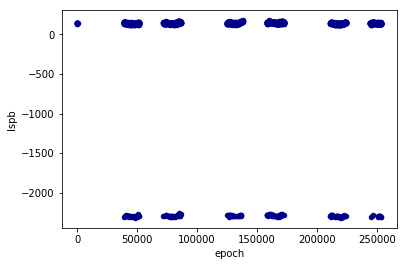

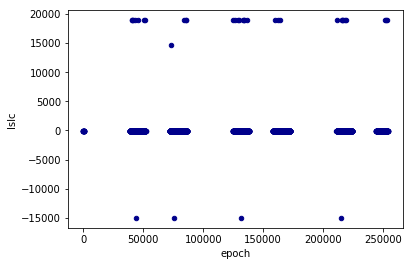

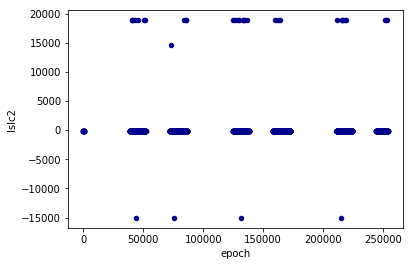

In [98]:
SVA.plot.scatter(x='epoch',y='Ispb',c='DarkBlue')
SVA.plot.scatter(x='epoch',y='Islc',c='DarkBlue')
SVA.plot.scatter(x='epoch',y='Islc2',c='DarkBlue')


In [74]:
SVA['Vtec'] =  SVA['Ispb']* np.sqrt(  1-(  (6400*np.cos(SVA['ele']*3.14/180))  /  (6400+350)   )     ) #
SVA['Vtec1'] =  SVA['Ispb']*  (np.cos  (np.arcsin(  (6400*np.cos(SVA['ele']*3.14/180))  /  (6400+350) )  )     ) #
SVA['Vtec2'] =   SVA['One']* np.sqrt(  1-(  (6400*np.cos(SVA['ele']*3.14/180))  /  (6400+350)   )     ) #
SVA['Vtec3'] =  SVA['One']*  (np.cos  (np.arcsin(  (6400*np.cos(SVA['ele']*3.14/180))  /  (6400+350) )  )     ) #
SVA['V'] =  SVA['Islc2']* np.sqrt(  1-(  (6400*np.cos(SVA['ele']*3.14/180))  /  (6400+350)   )     ) #
SVA['V1'] =  SVA['Islc2']*  (np.cos  (np.arcsin(  (6400*np.cos(SVA['ele']*3.14/180))  /  (6400+350) )  )     ) #

#SVAt.plot.scatter(x='epoch',y='Vtec',c='DarkBlue')
#SVAt.plot.scatter(x='epoch',y='Vtec1',c='DarkBlue')
#SVAt.plot.scatter(x='epoch',y='Vtec2',c='DarkGreen')
#SVAt.plot.scatter(x='epoch',y='Vtec3',c='DarkGreen')
out = SVA.loc[:,["svs_x","epoch","ele","azi","Islc","Ispb","Vtec1"]]
out.to_csv('out_.csv',sep=';') 

c:\users\helg\myvirt\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\helg\myvirt\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
c:\users\helg\myvirt\lib\site-packages\matplotlib\axes\_base.py:239: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


Text(0, 0.5, 'TEC')

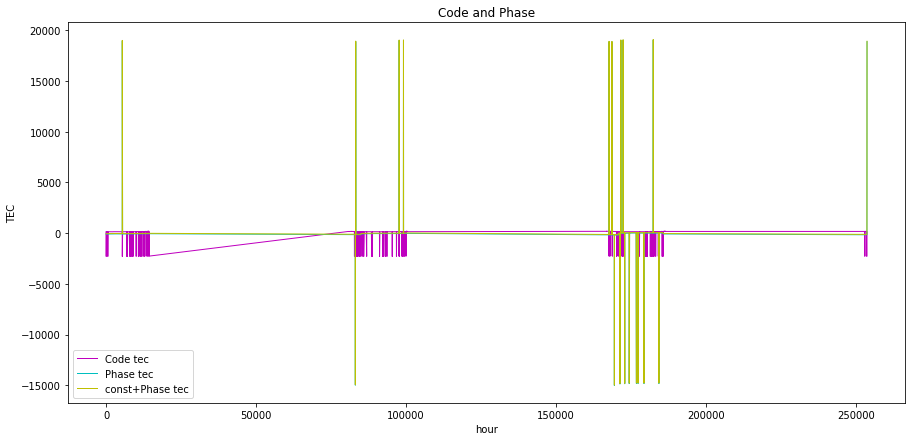

In [75]:
plt.show()
plt.figure(figsize=(15,7))
plt.plot(SVA.epoch,SVA.Ispb , 'm', lw=1)
plt.plot(SVA.epoch,SVA.Islc , 'c', lw=1)
plt.plot(SVA.epoch,SVA.Islc2 , 'y', lw=1)
#plt.plot(df['VtecL'], 'g', lw=1)
#plt.plot(df['VtecL2'], 'b', lw=1)
plt.title('Code and Phase')
plt.legend(['Code tec', 'Phase tec', 'const+Phase tec'])
plt.xlabel('hour')
plt.ylabel('TEC')

Text(0, 0.5, 'TEC')

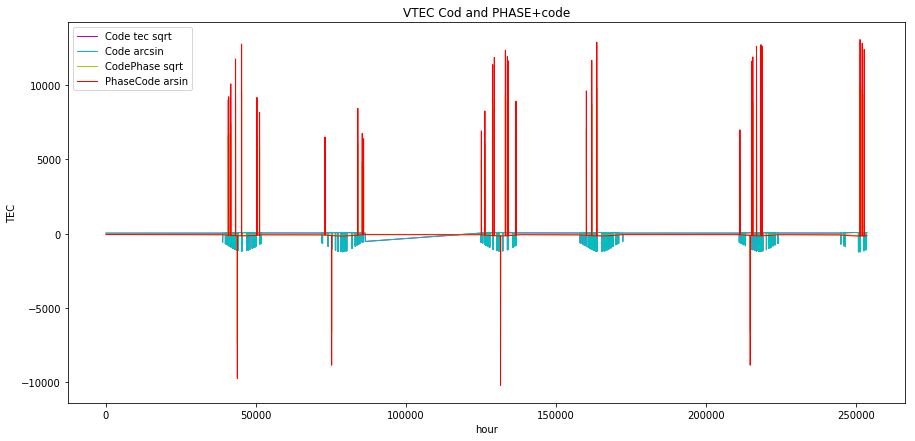

In [62]:
plt.show()
plt.figure(figsize=(15,7))
plt.plot(SVA.epoch,SVA.Vtec , 'm', lw=1)
plt.plot(SVA.epoch,SVA.Vtec , 'c', lw=1)
plt.plot(SVA.epoch,SVA.V , 'y', lw=1)
plt.plot(SVA.epoch,SVA.V1 , 'r', lw=1)
#plt.plot(df['VtecL'], 'g', lw=1)
#plt.plot(df['VtecL2'], 'b', lw=1)
plt.title('VTEC Cod and PHASE+code')
plt.legend(['Code tec sqrt', 'Code arcsin', 'CodePhase sqrt','PhaseCode arsin'])
plt.xlabel('hour')
plt.ylabel('TEC')

In [100]:
lat = 42.46386370313852 #shitot ot ecvat   MARKS   TPLK
lon = 78.52905690246126# dolg merid-i po ekvat

#lat= np.radians(lat)
#lon = np.radians(lon)
# от сентра земли угол между прибором и под ион точкой
#Bplat
SVA['F'] = np.pi/2 - (np.radians(SVA['ele']))- np.arcsin(6400/6850*np.cos(np.radians(SVA['ele']))) #1.209
#SVA['F'] = np.pi/2 - (SVA['ele'])- np.arcsin(6400*np.cos(SVA['ele'])/6850) #1.209
#SVA['F'] = (np.radians(180)-(np.radians(90) - ((SVA['ele']))- lon)) #1.209
#SVA['F'] = (90 - (np.radians(SVA['ele']))- np.arcsin(6400 * np.cos(np.radians(SVA['ele'])) /6850)) #1.209
#SVA['F'] = (np.pi/2 - (np.radians(SVA['ele']))- np.arcsin(6400 * np.cos(np.radians(SVA['ele'])) /6750)) #1.209
#SVA['F'] = (np.pi/2 - (np.radians(SVA['ele']))- np.arcsin(6400 * np.cos(np.radians(SVA['ele'])) /6750)) #1.209
#SVA['F'] = np.pi/2 - (SVA['ele']*np.pi/180)- np.arcsin(6400*np.cos(SVA['ele']*np.pi/180)/6850) #1.209
SVA['lat']= np.arcsin( np.sin((lat))*np.cos(SVA['F']) + np.cos((lat)) * sin(SVA['F'])* np.cos(((SVA['azi'])))  ) #
#SVA['lat']= np.arcsin(  np.sin((lat)) * np.cos((SVA['F'])) + np.cos((lat))*sin((SVA['F'])) *np.cos(np.radians(SVA['azi']))  ) #
#SVA['lon']= lon + np.arcsin(  np.sin(SVA['F']) * np.sin(np.radians(SVA['azi']))*np.radians(np.radians(lat))    ) #   
SVA['lon']= lon + np.arcsin(  np.sin(SVA['F']) * np.sin(np.radians(SVA['azi']))*(np.radians(lat))    ) 
#np.cos(SVA['ele'])
#np.arcsin(0.934*-0.0024)
SVA[['F','lat','lon']]
#SVA['lat']
#SVA.plot.scatter(x='lon',y='lat',c='DarkBlue')

F       lat        lon
0     0.280257 -1.238551  78.654377
1     0.282804 -1.236084  78.655453
2     0.285364 -1.233603  78.656538
3     0.287965 -1.231082  78.657641
4     0.290593 -1.228531  78.658758
...        ...       ...        ...
2617  0.090079 -1.510486  78.583094
2618  0.090484 -1.520445  78.583187
2619  0.090893 -1.528092  78.583282
2620  0.091311 -1.531671  78.583381
2621  0.091734 -1.529953  78.583482

[2622 rows x 3 columns]

In [657]:
#lat shirota - lon dolgota 
#la,lo,ele,azi = (42.463815979, 78.529105420, 10, 90)#    42.46381598 91.62774772

#la,lo,ele,azi = (42.463815979, 78.529105420, 26.24379763, 204.7968546)#37.41310399	75.61686173
la,lo,ele,azi = (42.463815979, 78.529105420,83.38821943,316.566825)#42.71447107	78.20555339
#la,lo,ele,azi =(42.463815979, 78.529105420,39.78006184,209.324377)#39.42545672	76.33591728

c =   np.degrees(  np.arcsin( np.sin(np.radians(ele+90))*6400/6820 ) )


##p= np.radians(90)+ np.radians(ele) - 6370*np.cos( np.radians(ele) )/6370+450
p= np.degrees( (np.radians(90-ele) ) - 6370 *np.sin( np.radians(ele) )/6820 ) 
p1= ( 90 - np.radians(ele)- np.arcsin(6370/6820*np.cos(np.radians(ele)) )) 
p2= ( 90 - np.radians(ele)- np.arcsin(6370/6820*np.sin(np.radians(ele)) )) 
########             p2= np.radians( 90)+ np.radians(ele) - 6370*np.cos( np.radians(ele) )/6370+450
#lat = np.arcsin(np.sin(42.463815979)*np.cos(p)+np.cos(42.463815979)*np.sin(p)*np.cos(90))
#lon = 78.529105420 + np.arcsin( np.sin(p)*np.sin(90)*np.cos(78.529105420)   ) #
ilat= la+(90-ele-c)*np.cos( np.radians(azi) )
ilon = lo+((90-ele-c)*np.sin(np.radians(azi)))

lat = np.degrees(np.arcsin(    np.sin(la) * np.cos(p) + np.cos(la) * np.sin(p) * np.cos( np.radians(azi) )      ))
lon = lo + np.arcsin( np.sin(c)*np.sin(np.radians(azi))*(1/np.cos(np.degrees(lat)))   ) #


#lat,lon
print('p ',p,p1,p2,'c ',c)
print('----------------KS-------------')
print(ilat,ilon)
print('-----------------------------')
print(lat,lon)

p  -46.54756161202846 88.43684853377762 87.35611410527038 c  6.202951987741899
----------------KS-------------
42.76069777652142 78.24803246155038
-----------------------------
54.74874575103064 nan


c:\users\helg\myvirt\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in arcsin


In [210]:
angles_array = np.array([0,30,45,60,90])
 
radians_array1 = np.radians(angles_array)
 
print('Calculating secant :')
cos_value = np.cos(radians_array1)
sec_value = np.arccos(cos_value)
#Секанс обратно пропорционален косинусу. У нас есть функция np.arccos() для вычисления секанса значения.
print('ugol ',angles_array)
print('radian ',radians_array1)
print('cos radian ',cos_value)
print('secans cos =  radian ',sec_value)

Calculating secant :
ugol  [ 0 30 45 60 90]
radian  [0.         0.52359878 0.78539816 1.04719755 1.57079633]
cos radian  [1.00000000e+00 8.66025404e-01 7.07106781e-01 5.00000000e-01
 6.12323400e-17]
secans cos =  radian  [0.         0.52359878 0.78539816 1.04719755 1.57079633]


In [752]:
import math
# https://gist.github.com/govert/1b373696c9a27ff4c72a
#937429.6846  4619604.6444  4285027.6573
x = float(557387.9329578421) #in meters 
y = float(4725492.685209478) #in meters
z = float(4285027.6573) #in meters
#x = float(937429.6846) #in meters
#y = float(4619604.6444) #in meters
#z = float(4285027.6573) #in meters

a = 6378137.0 #in meters   // WGS-84 Большая полуось Земли (м)
b = 6356752.314245 #in meters  // Полученная малая полуось Земли (м)
#print(a-b)
f = (a - b) / a #// Плоскостность эллипсоида
f_inv = 1.0 / f #// Обратное сглаживание      // WGS-84 Фактор сплющивания Земли

e_sq = f * (2 - f)              # // Квадрат эксцентриситета         
eps = e_sq / (1.0 - e_sq)

p = math.sqrt(x * x + y * y)
q = math.atan2((z * a), (p * b))

sin_q = math.sin(q)
cos_q = math.cos(q)

sin_q_3 = sin_q * sin_q * sin_q
cos_q_3 = cos_q * cos_q * cos_q

phi = math.atan2((z + eps * b * sin_q_3), (p - e_sq * a * cos_q_3))
lam = math.atan2(y, x)

v = a / math.sqrt(1.0 - e_sq * math.sin(phi) * math.sin(phi))
h   = (p / math.cos(phi)) - v

lat = math.degrees(phi)
lon = math.degrees(lam)

print(lat,lon,h)

42.194909137968935 83.2728513216104 34779.36869988311


In [680]:
import pyproj
import numpy as np

lon1 =42.7578042
lat1 = 74.90080195

lon2 = 42.7578042
lat2 = 74.70044631

x1, y1 = pyproj.transform(wgs84, epsg3035, lon1, lat1)
print(x1, y1)

x2, y2 = pyproj.transform(wgs84, epsg3035, lon2, lat2)
print(x2, y2)

# a Pythagore's theorem is sufficient to compute an approximate distance
distance_m = np.sqrt((x2-x1)**2 + (y2-y1)**2)
print(distance_m)

NameError: name 'wgs84' is not defined

In [ ]:
import matplotlib.pyplot as plt
a =1*3.14/180
x0 = 562835.7577197319  #42.194909137968935 
y0 = 4728432.890109696  #83.2728513216104
x1 = 557387.9329578421  #42.194909137968935 
y1 =4725492.685209478   #83.2728513216104
x2 = 573803.2750079716
y2 = 4725648.192455014
x3 = 557316.0651933822
y3 = 4734157.792664597
x11 = x0+(x1-x0)*np.cos(a)-(y1-y0)*np.sin(a)
y11 = y0+(x1-x0)*np.sin(a)+(y1-y0)*np.cos(a)
x22 = x0+(x2-x0)*np.cos(a)-(y2-y0)*np.sin(a)
y22 = y0+(x2-x0)*np.sin(a)+(y2-y0)*np.cos(a)
x33 = x0+(x3-x0)*np.cos(a)-(y3-y0)*np.sin(a)
y33 = y0+(x3-x0)*np.sin(a)+(y3-y0)*np.cos(a)
X_train = np.array([[x1,y1], [x2,y2], [x3, y3], [x0, y0],[x11,y11],[x22,y22],[x33,y33]])
Y_train = ['red', 'red', 'red', 'blue','green','green','green']
plt.figure()
plt.scatter(X_train[:, 0], X_train[:, 1], s = 170, color = Y_train[:])
plt.show()
#print(x11,y11)
print(x11-x1/x1,y11-y1/y1)
#print(x22,y22)
print(x22-x2/x2,y22-y2/y2)
#print(x33,y33)
print(x33-x3/x3,y33-y3/y3)

In [20]:
from gnss_tec import rnx
from gnss_tec.glo import collect_freq_nums

glo_freq_nums = collect_freq_nums('TPKL1681.22G')

with open('TPKL1681.22O') as obs_file:
    reader = rnx(obs_file, glo_freq_nums=glo_freq_nums)
    for tec in reader:
        print(
            '{} {}: {} {}'.format(
                tec.timestamp,
                tec.satellite,
                tec.phase_tec,
                tec.p_range_tec,
            )
        )

2022-06-17 03:46:00 G01: -126.5991582357203 146.25932432531073
2022-06-17 03:46:00 G02: -99.66569627099416 119.72382640632493
2022-06-17 03:46:00 G03: -162.7045879435666 137.6743102760123
2022-06-17 03:46:00 G06: -102.97654222608108 132.953504343946
2022-06-17 03:46:00 G11: -143.7568691368078 131.12609561320568
2022-06-17 03:46:00 G12: -113.13882672514012 133.05819963636534
2022-06-17 03:46:00 G14: -96.28478837045682 122.16988915384151
2022-06-17 03:46:00 G17: None None
2022-06-17 03:46:00 G19: -81.76827403296865 93.02652669756844
2022-06-17 03:46:00 G24: -138.00716428752176 120.38055140951663
2022-06-17 03:46:30 G01: -126.4239276904164 135.78027727472448
2022-06-17 03:46:30 G02: -99.85236742532175 135.52329789481783
2022-06-17 03:46:30 G03: -162.7453694296533 151.8747990940831
2022-06-17 03:46:30 G06: -98.45372282537433 -2304.15304359181
2022-06-17 03:46:30 G11: -144.0666090881154 147.52518557208253
2022-06-17 03:46:30 G12: -113.35118625132266 123.80694284613546
2022-06-17 03:46:30 G1

2022-06-17 05:52:30 G25: -185.73015227771893 131.5734299961023
2022-06-17 05:53:00 G02: -128.9531337016893 92.56967450601925
2022-06-17 05:53:00 G06: None None
2022-06-17 05:53:00 G11: -174.16726109265423 108.52143004654309
2022-06-17 05:53:00 G12: -23.368388294279907 103.24859440370442
2022-06-17 05:53:00 G17: -54.032615534091434 152.80753898811736
2022-06-17 05:53:00 G19: -63.40299684540814 117.66799154435363
2022-06-17 05:53:00 G20: -169.3820335832039 128.15655636813602
2022-06-17 05:53:00 G25: -185.85614920573065 137.71238129788415
2022-06-17 05:53:30 G02: -128.97812783730475 97.2619271894099
2022-06-17 05:53:30 G06: -97.5222691475721 137.40781315836588
2022-06-17 05:53:30 G11: -174.19723593008302 104.05760349438343
2022-06-17 05:53:30 G12: -25.686834713796724 -2331.145393631432
2022-06-17 05:53:30 G19: -63.26788365243191 110.97701056725582
2022-06-17 05:53:30 G20: -169.49930671310176 134.9617504108493
2022-06-17 05:53:30 G25: -185.96641920097045 145.44079746143555
2022-06-17 05:54

2022-06-17 06:59:30 G20: -184.4899848985435 122.2841021840006
2022-06-17 06:59:30 G25: -194.11248090128223 137.30311790140294
2022-06-17 06:59:30 G29: -148.78364614708101 120.42814020458461
2022-06-17 07:00:00 G02: -129.89294899051725 87.15407254888942
2022-06-17 07:00:00 G05: -205.12450516809108 128.55630202687746
2022-06-17 07:00:00 G06: -83.05399227992216 152.1412962117295
2022-06-17 07:00:00 G09: -144.57923011355285 172.13809717019205
2022-06-17 07:00:00 G11: -174.82015708869713 106.07536729902651
2022-06-17 07:00:00 G12: -55.03850824946683 120.64704852716304
2022-06-17 07:00:00 G20: -184.5375582700791 111.01508158912766
2022-06-17 07:00:00 G25: -194.11399017370337 132.35388583810564
2022-06-17 07:00:00 G29: -148.97641480879244 122.83613193022936
2022-06-17 07:00:30 G02: -129.8591103277585 87.81079755208111
2022-06-17 07:00:30 G05: -205.39032428852752 130.72634991900784
2022-06-17 07:00:30 G06: -82.88721386582374 151.27518058824273
2022-06-17 07:00:30 G09: -144.38510304638655 171.8

2022-06-17 08:52:30 G11: -153.22831365822006 112.49985119393429
2022-06-17 08:52:30 G13: -143.04239339354405 130.05058940488024
2022-06-17 08:52:30 G15: -147.87413778028954 146.00234494540408
2022-06-17 08:52:30 G18: -179.960101910023 115.10771576667796
2022-06-17 08:52:30 G20: -181.31932342933862 108.67371409857401
2022-06-17 08:52:30 G25: -174.03779269979395 188.61332920826894
2022-06-17 08:52:30 G26: -168.89335016368508 158.9464902544428
2022-06-17 08:52:30 G29: 9.915180789212748 104.0671212321232
2022-06-17 08:53:00 G02: -113.96215367594587 104.46686689086462
2022-06-17 08:53:00 G05: 90.91702872162848 102.94402626418616
2022-06-17 08:53:00 G11: -153.04348389637772 122.16988915384151
2022-06-17 08:53:00 G13: -143.30060566326273 126.51950271129846
2022-06-17 08:53:00 G15: -148.3299484756539 139.31136396830627
2022-06-17 08:53:00 G18: -180.13219311054246 128.05186111117308
2022-06-17 08:53:00 G20: -181.2143360116702 105.3996067848989
2022-06-17 08:53:00 G25: -173.76666086384927 -2266.

2022-06-17 10:38:00 G15: 47.15751101565272 109.64452501448012
2022-06-17 10:38:00 G16: -116.2137679440637 123.38816164100172
2022-06-17 10:38:00 G18: -192.3230163294278 112.47129794525861
2022-06-17 10:38:00 G23: -146.68764142185913 113.05188090470665
2022-06-17 10:38:00 G29: -43.112296718898456 122.32217320587243
2022-06-17 10:38:30 G05: 96.43665481705217 -2316.982975835233
2022-06-17 10:38:30 G10: -172.03557631218837 167.0841698499318
2022-06-17 10:38:30 G13: -166.30211162701065 115.62167449103487
2022-06-17 10:38:30 G15: 47.05762509973979 107.03666044173646
2022-06-17 10:38:30 G16: -116.17141680331298 131.3925926953957
2022-06-17 10:38:30 G18: -192.35848506454988 107.03666044173646
2022-06-17 10:38:30 G23: -146.7914213364953 127.18574548768632
2022-06-17 10:38:30 G29: -42.95928315151374 127.73777519845868
2022-06-17 10:39:00 G05: 96.61013459641975 116.33550602703431
2022-06-17 10:39:00 G10: -172.43433521942086 168.04546302809814
2022-06-17 10:39:00 G13: -166.30482833155125 119.30504

2022-06-17 12:43:00 G23: -154.49803319912402 108.81648044832158
2022-06-17 12:43:00 G24: -188.81586993645078 148.30564137862947
2022-06-17 12:43:00 G27: -168.19816337367797 150.6470088691831
2022-06-17 12:43:00 G32: -188.917234986848 145.85006089337315
2022-06-17 12:43:30 G08: -161.023612392166 154.292308592924
2022-06-17 12:43:30 G10: 9.595388807729607 129.79361006042998
2022-06-17 12:43:30 G15: 70.17727957635368 125.70097584742328
2022-06-17 12:43:30 G18: -180.83051924533402 128.55630202687746
2022-06-17 12:43:30 G23: -154.44490558310864 109.23526158254253
2022-06-17 12:43:30 G24: -188.87790249730872 145.33610216901621
2022-06-17 12:43:30 G27: -168.11702307720483 138.22633998678467
2022-06-17 12:43:30 G32: -189.12890024133466 157.82339528650576
2022-06-17 12:44:00 G08: -161.06877086400627 159.61273303083064
2022-06-17 12:44:00 G10: None None
2022-06-17 12:44:00 G15: 70.34327316312009 117.93448866200005
2022-06-17 12:44:00 G18: -180.73289729123738 125.58676281726419
2022-06-17 12:44:0

2022-06-17 14:39:00 G32: None None
2022-06-17 14:39:30 G01: -142.5152226940609 142.9852169761792
2022-06-17 14:39:30 G08: -155.6580261849742 162.477576983481
2022-06-17 14:39:30 G10: None None
2022-06-17 14:39:30 G21: -141.69735943209878 -2316.6784076957147
2022-06-17 14:39:30 G22: -177.6925191447053 118.33423435619787
2022-06-17 14:39:30 G23: -140.78987349815205 129.23206257646146
2022-06-17 14:39:30 G24: -187.63571268528858 134.69525329320288
2022-06-17 14:39:30 G31: -144.83578213751497 145.1838181169853
2022-06-17 14:39:30 G32: None None
2022-06-17 14:40:00 G01: -142.5945518423548 151.02771901698864
2022-06-17 14:40:00 G10: None None
2022-06-17 14:40:00 G21: -141.71064132723853 108.67371409857401
2022-06-17 14:40:00 G22: -177.74111883708807 110.97701056725582
2022-06-17 14:40:00 G23: -140.71039341197908 130.45985283681782
2022-06-17 14:40:00 G24: -187.5981007173796 142.02392379801287
2022-06-17 14:40:00 G31: -145.21368236591402 136.44652001565595
2022-06-17 14:40:00 G32: None None
2

2022-06-17 16:40:00 G26: -153.79457546009652 147.63939863769804
2022-06-17 16:40:00 G31: None None
2022-06-17 16:40:00 G32: 35.01012564060817 126.37673639700729
2022-06-17 16:40:30 G01: -158.19191105775874 129.93637637472114
2022-06-17 16:40:30 G03: -167.98000818041328 130.08866042675206
2022-06-17 16:40:30 G10: -1.5134726213002616 138.0835737079499
2022-06-17 16:40:30 G12: -105.79055450620177 127.59500891962391
2022-06-17 16:40:30 G21: -141.02897796134275 109.78729132877129
2022-06-17 16:40:30 G22: -184.69531101030555 101.6020229736707
2022-06-17 16:40:30 G25: -174.1212875846323 131.2783796652366
2022-06-17 16:40:30 G26: -154.0995761321932 155.11083545679918
2022-06-17 16:40:30 G31: None None
2022-06-17 16:40:30 G32: -14802.13788137633 126.22445234497637
2022-06-17 16:41:00 G01: -158.190794145819 122.42686853374816
2022-06-17 16:41:00 G03: -168.01442038583852 137.26504687953113
2022-06-17 16:41:00 G10: -1.0952436495388307 150.351958502861
2022-06-17 16:41:00 G12: -105.7879887040838 12

2022-06-17 18:44:30 G31: 53.72755440883908 83.61346804665509
2022-06-17 18:45:00 G03: None None
2022-06-17 18:45:00 G04: -166.07942843920054 112.75683053838455
2022-06-17 18:45:00 G09: 18900.24359866737 -2318.877008836521
2022-06-17 18:45:00 G16: -98.54464348511459 104.05760345892703
2022-06-17 18:45:00 G22: -178.54313436633606 -2313.2996050541637
2022-06-17 18:45:00 G26: None None
2022-06-17 18:45:00 G31: 53.74014199682656 77.88378021226724
2022-06-17 18:45:30 G03: None None
2022-06-17 18:45:30 G04: -166.1749374048163 108.70226734724969
2022-06-17 18:45:30 G09: -140.86047888378846 132.2491905811427
2022-06-17 18:45:30 G16: -98.54219837656962 94.5493673242469
2022-06-17 18:45:30 G22: -178.48659573862778 123.28346634858238
2022-06-17 18:45:30 G26: -56.751028292960235 127.73777519845868
2022-06-17 18:45:30 G31: 53.74240595864286 77.7790849198479
2022-06-17 18:46:00 G03: -56.530910942724496 125.2917124509421
2022-06-17 18:46:00 G04: -166.21312287993538 106.06584952583036
2022-06-17 18:46:

2022-06-17 21:05:00 G04: 18873.70690338588 107.33171084351495
2022-06-17 21:05:00 G07: -104.23180264857547 96.1769032433447
2022-06-17 21:05:00 G08: -148.4529569613038 -2293.969046872089
2022-06-17 21:05:00 G09: None None
2022-06-17 21:05:00 G16: -106.61985830627478 92.35076618344083
2022-06-17 21:05:00 G26: -44.91612981806993 124.62546967455424
2022-06-17 21:05:00 G27: -123.26857058465242 121.46557535558182
2022-06-17 21:05:30 G04: -167.19024819000145 107.59820792570497
2022-06-17 21:05:30 G07: -104.308294327843 82.38567782175511
2022-06-17 21:05:30 G08: -148.53850452329297 144.92683873707864
2022-06-17 21:05:30 G09: None None
2022-06-17 21:05:30 G16: -106.60896113743712 90.1616827803745
2022-06-17 21:05:30 G26: -44.84172098934641 119.82852169874427
2022-06-17 21:05:30 G27: -123.29788132377857 122.31265546813268
2022-06-17 21:06:00 G04: -167.19737212460169 106.370417700805
2022-06-17 21:06:00 G07: -104.43223861416035 93.02652669756844
2022-06-17 21:06:00 G08: -148.7041962343013 140.01

2022-06-17 23:22:00 G14: 18913.22475534842 -2329.660624026625
2022-06-17 23:22:00 G21: -88.47608694142896 104.84757703867014
2022-06-17 23:22:00 G27: -51.61802622404949 133.46746306830292
2022-06-17 23:22:00 G30: -66.11171983210235 119.1622789223564
2022-06-17 23:22:30 G07: None None
2022-06-17 23:22:30 G08: -75.8462969073473 125.177499420783
2022-06-17 23:22:30 G09: -52.9603736543474 136.1895406712057
2022-06-17 23:22:30 G13: -68.34636952647912 110.71051344960941
2022-06-17 23:22:30 G14: -127.82064034224243 105.80887018138009
2022-06-17 23:22:30 G21: -88.54394541367513 108.407217016384
2022-06-17 23:22:30 G27: -51.40548565750746 133.06771740956148
2022-06-17 23:22:30 G30: -75.41321635032568 124.92052004087634
2022-06-17 23:23:00 G07: None None
2022-06-17 23:23:00 G08: -80.45614293361469 118.75301549041882
2022-06-17 23:23:00 G09: -52.81225030405264 132.91543332207416
2022-06-17 23:23:00 G13: -68.52292823293187 103.36280743386351
2022-06-17 23:23:00 G14: -127.74804266169811 102.6870469

2022-06-18 01:15:00 G01: -165.95916690239727 -2304.971570384772
2022-06-18 01:15:00 G07: -69.50252882493619 104.46686689086462
2022-06-18 01:15:00 G08: -67.0397624627553 145.45031523463172
2022-06-18 01:15:00 G13: -66.57592227642931 109.1971905961271
2022-06-18 01:15:00 G14: -128.10734827944918 105.70417492441715
2022-06-18 01:15:00 G15: -92.90279373137301 114.54616828270943
2022-06-18 01:15:00 G17: -53.988875814492566 104.47638466406079
2022-06-18 01:15:00 G19: -117.72225993446345 104.17181652454254
2022-06-18 01:15:00 G21: -95.25824833182628 110.05378844641771
2022-06-18 01:15:00 G30: None None
2022-06-18 01:15:30 G01: -166.0041140541156 137.26504687953113
2022-06-18 01:15:30 G07: -69.41975845609974 105.96115426886742
2022-06-18 01:15:30 G08: -66.87262182611232 152.54104187047093
2022-06-18 01:15:30 G13: -66.50208699037228 100.49796351666959
2022-06-18 01:15:30 G14: -128.09361360612874 106.52270175283593
2022-06-18 01:15:30 G15: -92.96120388950338 134.02901051681505
2022-06-18 01:15:

2022-06-18 03:14:30 G01: -151.81336854737785 155.52009888873675
2022-06-18 03:14:30 G03: -157.76785613915268 139.60641429917197
2022-06-18 03:14:30 G06: -160.40434373875993 135.7802772392681
2022-06-18 03:14:30 G14: -115.95081653695969 120.39006918271278
2022-06-18 03:14:30 G17: -48.71985499624419 100.12677110660383
2022-06-18 03:14:30 G19: -126.94409525524154 93.94974881840656
2022-06-18 03:14:30 G24: -152.35264391873093 148.15335732659855
2022-06-18 03:15:00 G01: -151.59708488453524 125.84374216171446
2022-06-18 03:15:00 G03: -157.7915221136193 -2280.7584044454043
2022-06-18 03:15:00 G06: -160.46894210173588 142.4712582518223
2022-06-18 03:15:00 G14: -115.84978353571378 118.3723053780697
2022-06-18 03:15:00 G17: None None
2022-06-18 03:15:00 G19: -126.94756661372092 94.39708323675958
2022-06-18 03:15:00 G24: -152.34633502031238 149.53343167444226
2022-06-18 03:15:30 G01: -151.53103756046826 142.43318722995045
2022-06-18 03:15:30 G03: -157.9445054721544 154.70157202486158
2022-06-18 0

2022-06-18 05:06:30 G11: -161.1155291639038 120.82788586332605
2022-06-18 05:06:30 G12: -138.91824234443368 96.95735904989165
2022-06-18 05:06:30 G17: -52.870268066245195 130.08866042675206
2022-06-18 05:06:30 G19: -120.74232277143533 103.80062411447678
2022-06-18 05:06:30 G20: -163.32249822697415 137.6743102760123
2022-06-18 05:06:30 G24: -135.2153991941699 158.12796342602402
2022-06-18 05:06:30 G25: -166.3709963846476 173.6609377968705
2022-06-18 05:07:00 G02: -160.39528789149472 101.45925665937953
2022-06-18 05:07:00 G03: -153.34652251787256 158.52770908476546
2022-06-18 05:07:00 G06: None None
2022-06-18 05:07:00 G11: -161.18951542329626 110.15848370338065
2022-06-18 05:07:00 G12: -138.91555577782992 105.43767780677072
2022-06-18 05:07:00 G17: -52.702342566813805 115.4789081767437
2022-06-18 05:07:00 G19: -120.63347152843693 104.43831364218894
2022-06-18 05:07:00 G20: -163.60627810406197 140.6819205074974
2022-06-18 05:07:00 G24: -135.0662796964212 160.42174212150968
2022-06-18 05:

2022-06-18 07:01:00 G09: -198.69500848333135 127.74729297165483
2022-06-18 07:01:00 G11: -167.22529428487968 111.3862739991934
2022-06-18 07:01:00 G12: -28.42954733658511 117.51570749232269
2022-06-18 07:01:00 G20: -201.9951382744837 115.8881715732249
2022-06-18 07:01:00 G25: -58.62972299903592 139.3494349901781
2022-06-18 07:01:00 G29: -160.82592337542775 113.98462079874092
2022-06-18 07:01:30 G02: -167.0264280094152 88.52462912353695
2022-06-18 07:01:30 G05: -184.45445578117852 113.31837802235306
2022-06-18 07:01:30 G06: -45.67247371505405 154.292308592924
2022-06-18 07:01:30 G09: -198.7362125032927 137.8170765903035
2022-06-18 07:01:30 G11: -167.18916152236778 109.78729132877129
2022-06-18 07:01:30 G12: -28.30690103802337 116.183221939547
2022-06-18 07:01:30 G20: -202.03078812087807 116.183221939547
2022-06-18 07:01:30 G25: -58.62806275327935 141.766944489019
2022-06-18 07:01:30 G29: -161.05618324056238 124.58739865268241
2022-06-18 07:02:00 G02: -166.9977813685917 86.62107831359658

2022-06-18 08:57:30 G05: 75.53688896973462 101.04999322744195
2022-06-18 08:57:30 G11: -142.23986470387248 140.6819205074974
2022-06-18 08:57:30 G13: -156.01986739599363 124.47318562252332
2022-06-18 08:57:30 G15: -166.22223907398708 141.5004473359162
2022-06-18 08:57:30 G18: -191.19782798039705 128.45160673445812
2022-06-18 08:57:30 G20: -194.12549109405717 123.65465875864814
2022-06-18 08:57:30 G25: -29.073025227361825 174.0702011933517
2022-06-18 08:57:30 G26: -167.19821736963297 172.2808635199396
2022-06-18 08:57:30 G29: None None
2022-06-18 08:58:00 G02: -147.4796351297812 120.94209892894153
2022-06-18 08:58:00 G05: None None
2022-06-18 08:58:00 G11: -141.95155690315204 140.42494116304715
2022-06-18 08:58:00 G13: -14993.254418122373 -2302.4017768339004
2022-06-18 08:58:00 G15: -166.48506982297448 135.52329789481783
2022-06-18 08:58:00 G18: -191.34987560917747 -2328.128265662207
2022-06-18 08:58:00 G20: -194.01365144415334 122.16988915384151
2022-06-18 08:58:00 G25: -28.70895022791

2022-06-18 10:52:00 G18: -207.44690596857401 110.45353410515914
2022-06-18 10:52:00 G23: -220.56688869459566 129.08929622671388
2022-06-18 10:52:00 G27: -155.2008872930046 158.52770908476546
2022-06-18 10:52:00 G29: -15.181031947457836 132.76314927004324
2022-06-18 10:52:30 G05: 73.70815232604022 106.36089992760884
2022-06-18 10:52:30 G10: -205.9863797811041 170.2440641334478
2022-06-18 10:52:30 G13: -174.291326108001 119.71430863312877
2022-06-18 10:52:30 G15: None None
2022-06-18 10:52:30 G16: -116.83750417431587 127.59500891962391
2022-06-18 10:52:30 G18: -207.44950194408526 105.55189083692983
2022-06-18 10:52:30 G23: -220.6498402101608 -2307.579434957516
2022-06-18 10:52:30 G27: -155.36691105316424 152.0937074521179
2022-06-18 10:52:30 G29: -14.994511801922073 131.54487678288302
2022-06-18 10:53:00 G05: 73.79599395232611 120.23778513068186
2022-06-18 10:53:00 G10: -206.39682071996268 164.51437629905996
2022-06-18 10:53:00 G13: -174.28912252842755 109.49224096244919
2022-06-18 10:53

2022-06-18 12:59:00 G23: -228.42228804127816 107.56013690383314
2022-06-18 12:59:00 G24: -213.2557152831427 128.15655640359242
2022-06-18 12:59:00 G27: -172.61822918059576 134.9617504108493
2022-06-18 12:59:00 G32: -201.11638960790944 145.96427395898863
2022-06-18 12:59:30 G08: -154.23858335934904 142.4712582163659
2022-06-18 12:59:30 G10: 51.10431849552194 132.2491905456863
2022-06-18 12:59:30 G15: 84.63200288195546 128.29932268242717
2022-06-18 12:59:30 G18: -196.01795071775933 118.89578184016639
2022-06-18 12:59:30 G22: -137.12071810822437 139.33991721698195
2022-06-18 12:59:30 G23: -228.40127853093486 106.07536729902651
2022-06-18 12:59:30 G24: -213.32426799162835 127.5950088841675
2022-06-18 12:59:30 G27: -172.5595473201006 140.42494116304715
2022-06-18 12:59:30 G32: -201.25808333075625 136.85578344759352
2022-06-18 13:00:00 G08: -154.32567036715255 151.42746467573008
2022-06-18 13:00:00 G10: None None
2022-06-18 13:00:00 G15: 84.75262667675968 124.06392219058573
2022-06-18 13:00:

2022-06-18 15:03:30 G24: 18841.341294835842 145.33610216901621
2022-06-18 15:03:30 G31: -129.62749209262537 115.73588752119397
2022-06-18 15:03:30 G32: 29.8677357461937 119.8665927206161
2022-06-18 15:04:00 G01: -155.8892218153199 -2295.0350353072185
2022-06-18 15:04:00 G10: None None
2022-06-18 15:04:00 G21: -113.18359276558618 103.7720708658011
2022-06-18 15:04:00 G22: -167.8997431959955 106.63691478299502
2022-06-18 15:04:00 G23: -207.381220902508 128.30884042016694
2022-06-18 15:04:00 G24: -199.56307126573353 155.78659597092678
2022-06-18 15:04:00 G31: -129.7985569013848 119.15276118461665
2022-06-18 15:04:00 G32: None None
2022-06-18 15:04:30 G01: -155.92789027746932 -2278.455107976722
2022-06-18 15:04:30 G10: None None
2022-06-18 15:04:30 G21: -113.18054397643786 102.27778348779832
2022-06-18 15:04:30 G22: -167.9458978152897 111.53855805122434
2022-06-18 15:04:30 G23: -207.16315622942304 128.55630202687746
2022-06-18 15:04:30 G24: -199.3784528240131 146.41160837734165
2022-06-18 

2022-06-18 16:58:00 G04: -127.78043239882223 -2296.7863020296713
2022-06-18 16:58:00 G21: -96.5433930361133 129.23206257646146
2022-06-18 16:58:00 G22: -171.23627755839377 105.43767780677072
2022-06-18 16:58:00 G25: -182.10383094465953 145.70729457908197
2022-06-18 16:58:00 G26: -164.75178169174015 161.5448370539903
2022-06-18 16:58:00 G31: None None
2022-06-18 16:58:00 G32: 20.793571032986062 130.05058940488024
2022-06-18 16:58:30 G01: -159.9571663213297 136.18002293346592
2022-06-18 16:58:30 G03: -183.39501291591307 130.20287345691116
2022-06-18 16:58:30 G04: -127.53743397236468 141.5004473713726
2022-06-18 16:58:30 G21: -96.21119457791497 144.2130072010792
2022-06-18 16:58:30 G22: -171.16980770045214 105.55189083692983
2022-06-18 16:58:30 G25: -182.13712630905783 159.08925656873396
2022-06-18 16:58:30 G26: -165.0785466699445 158.64192215038094
2022-06-18 16:58:30 G31: None None
2022-06-18 16:58:30 G32: 20.83598252052328 137.41733093156205
2022-06-18 16:59:00 G01: -159.86675878655666

2022-06-18 19:04:30 G29: -82.28518148852355 123.80694284613546
2022-06-18 19:04:30 G31: 41.36092710198336 100.24098417221931
2022-06-18 19:05:00 G03: -43.03233361023875 124.10199321245756
2022-06-18 19:05:00 G04: -165.97803325086647 108.26445070209283
2022-06-18 19:05:00 G09: -149.9808585985332 122.27458444626085
2022-06-18 19:05:00 G16: -128.62654990567003 99.0036761741232
2022-06-18 19:05:00 G22: -150.47769223804303 -2306.8656034215164
2022-06-18 19:05:00 G26: -44.44338465144496 137.93128962046256
2022-06-18 19:05:00 G29: -82.2878680905837 111.42434498560884
2022-06-18 19:05:00 G31: 41.472525222915614 97.92816996579775
2022-06-18 19:05:30 G03: None None
2022-06-18 19:05:30 G04: -166.04232970262794 106.07536729902651
2022-06-18 19:05:30 G09: -150.04485324544942 126.92876610777965
2022-06-18 19:05:30 G16: -128.6592414830958 99.93641603270108
2022-06-18 19:05:30 G22: -150.41466360064393 136.07532764104658
2022-06-18 19:05:30 G26: -42.15071723033203 133.76251343462502
2022-06-18 19:05:30

2022-06-18 21:22:30 G30: -147.27877655940887 138.7878875062096
2022-06-18 21:23:00 G04: -163.72318901141526 112.47129794525861
2022-06-18 21:23:00 G07: -118.8396903885282 95.9960659071817
2022-06-18 21:23:00 G08: -151.04833106112946 -2310.577527451261
2022-06-18 21:23:00 G09: None None
2022-06-18 21:23:00 G16: -134.26673941365505 92.76002957992202
2022-06-18 21:23:00 G20: -112.71350406308451 116.04045562525583
2022-06-18 21:23:00 G26: -17.72445565453791 139.7111096270477
2022-06-18 21:23:00 G27: -167.26891327544917 122.72191886461387
2022-06-18 21:23:00 G30: -147.37908508010926 133.17241270198082
2022-06-18 21:23:30 G04: -163.64446350826827 -2322.255811513528
2022-06-18 21:23:30 G07: -118.89393491648332 96.40532933911929
2022-06-18 21:23:30 G08: -151.18401772585938 121.49412863971389
2022-06-18 21:23:30 G09: None None
2022-06-18 21:23:30 G16: -134.27141823971027 95.32030535759769
2022-06-18 21:23:30 G20: -112.7860111170799 102.02080414334804
2022-06-18 21:23:30 G26: -17.612827324756008

2022-06-18 23:34:30 G09: -4.813451510029988 -2303.229821435515
2022-06-18 23:34:30 G13: -92.53588115653497 99.15596022615412
2022-06-18 23:34:30 G14: -124.34866077317301 102.27778348779832
2022-06-18 23:34:30 G21: -96.3883871738207 -2310.43476113697
2022-06-18 23:34:30 G27: -13.840284416129991 155.92936224976154
2022-06-18 23:34:30 G30: -67.1856521309962 123.13118229655146
2022-06-18 23:35:00 G07: -34.010360747835456 98.29936237586351
2022-06-18 23:35:00 G08: -74.23794920988426 129.64132597294264
2022-06-18 23:35:00 G09: -4.674927376273674 134.14322358243052
2022-06-18 23:35:00 G13: -92.6069997380514 106.22765135105743
2022-06-18 23:35:00 G14: -124.34467621881365 102.53476286770497
2022-06-18 23:35:00 G21: -96.30362451007636 129.7936100249736
2022-06-18 23:35:00 G27: -13.670940164457205 139.97760670923773
2022-06-18 23:35:00 G30: -69.46530932387782 125.03473307103543
2022-06-18 23:35:30 G07: None None
2022-06-18 23:35:30 G08: -74.1227891039237 130.7644209408797
2022-06-18 23:35:30 G09:

2022-06-19 01:27:00 G21: -95.76093809157399 -2325.672685141494
2022-06-19 01:27:00 G30: None None
2022-06-19 01:27:30 G01: -161.24025831300958 143.69904851217865
2022-06-19 01:27:30 G07: -63.524164009485595 134.43827394875262
2022-06-19 01:27:30 G13: -82.14638565240242 115.62167445557847
2022-06-19 01:27:30 G14: -117.483064951093 113.98462079874092
2022-06-19 01:27:30 G15: -123.48579004816247 138.37862407427198
2022-06-19 01:27:30 G17: None None
2022-06-19 01:27:30 G19: -81.39828256650185 102.53476286770497
2022-06-19 01:27:30 G21: -95.82562701018607 123.5499635016852
2022-06-19 01:27:30 G30: None None
2022-06-19 01:28:00 G01: -161.27346308631533 151.42746467573008
2022-06-19 01:28:00 G07: -63.227102166345226 133.46746303284652
2022-06-19 01:28:00 G13: -82.01003485391347 106.88437635424913
2022-06-19 01:28:00 G14: -117.44744527809189 113.58487513999948
2022-06-19 01:28:00 G15: -123.5011849317831 150.4947248171522
2022-06-19 01:28:00 G17: -96.15595393796231 112.65213524596521
2022-06-19

2022-06-19 03:29:30 G03: -164.8744279903019 151.32276938331074
2022-06-19 03:29:30 G06: None None
2022-06-19 03:29:30 G11: -85.04434552462939 156.08164633724888
2022-06-19 03:29:30 G12: -137.50441414553117 141.90971073239737
2022-06-19 03:29:30 G14: -101.91918217590326 126.2149345717802
2022-06-19 03:29:30 G17: -77.13283011956966 106.37041766534861
2022-06-19 03:29:30 G19: -96.42458035403189 98.74669679421653
2022-06-19 03:29:30 G24: -200.0324656965393 143.9560278566289
2022-06-19 03:30:00 G01: -149.41302710653633 163.99089983696328
2022-06-19 03:30:00 G02: -128.80018055200384 148.71490481056708
2022-06-19 03:30:00 G03: -164.8687529813363 145.45031523463172
2022-06-19 03:30:00 G06: -33.236599428016795 141.2053970050505
2022-06-19 03:30:00 G11: -85.38294347233882 148.1914283484704
2022-06-19 03:30:00 G12: -137.7329232447295 -2298.31866039409
2022-06-19 03:30:00 G14: -101.81316840193126 127.5950088841675
2022-06-19 03:30:00 G17: -74.80514677697175 107.18894449376738
2022-06-19 03:30:00 G

2022-06-19 05:21:30 G25: -171.09675720627072 149.00995517688915
2022-06-19 05:22:00 G02: -169.03006322017498 97.10964313737897
2022-06-19 05:22:00 G06: 6.876613790859855 131.42114594407138
2022-06-19 05:22:00 G11: -126.07567017938203 117.41101219990335
2022-06-19 05:22:00 G12: -167.8475815540408 107.85518727015524
2022-06-19 05:22:00 G17: -58.21197704976123 125.70097588287967
2022-06-19 05:22:00 G19: -86.63621159992533 105.80887021683648
2022-06-19 05:22:00 G20: -160.26092938791368 135.485226872946
2022-06-19 05:22:00 G24: -171.22003742974186 175.55497083361473
2022-06-19 05:22:00 G25: -171.1984844792125 163.1723730085445
2022-06-19 05:22:30 G02: -169.0965029047234 -2334.5717850680508
2022-06-19 05:22:30 G06: 6.909969502044656 131.16416659962113
2022-06-19 05:22:30 G11: -126.09936632724188 114.39388423067851
2022-06-19 05:22:30 G12: -167.9020675400547 111.93830370996577
2022-06-19 05:22:30 G17: -58.026724718587836 122.16988915384151
2022-06-19 05:22:30 G19: -86.47688913412205 98.746696

2022-06-19 07:20:00 G29: -169.24716188374288 121.76062575736032
2022-06-19 07:20:30 G02: -170.82973061825842 96.55761342660661
2022-06-19 07:20:30 G05: -217.81013955818514 122.32217320587243
2022-06-19 07:20:30 G06: 15.013830964028358 149.53343163898586
2022-06-19 07:20:30 G09: -134.56464639545754 143.54676446014773
2022-06-19 07:20:30 G11: -126.86977698215416 115.8881715732249
2022-06-19 07:20:30 G12: -19.34536080205157 -2309.3211839422293
2022-06-19 07:20:30 G20: -189.76972177435727 115.32662408925638
2022-06-19 07:20:30 G25: -184.4298842858069 141.91922854104993
2022-06-19 07:20:30 G29: -169.37074394751565 108.67371413403042
2022-06-19 07:21:00 G02: -170.84959311418154 97.51890653386016
2022-06-19 07:21:00 G05: -217.94703369049094 120.53283549700394
2022-06-19 07:21:00 G06: 15.05681602968846 -2308.1314647037443
2022-06-19 07:21:00 G09: -134.3992867336005 154.43507490721515
2022-06-19 07:21:00 G11: -126.84363572574932 110.72003118734916
2022-06-19 07:21:00 G12: -19.151082832462606 11

2022-06-19 09:11:30 G20: -183.64048658885244 120.53283546154755
2022-06-19 09:11:30 G23: -139.64645276101788 160.12669175518758
2022-06-19 09:11:30 G25: -135.5072991887683 205.11711449502153
2022-06-19 09:11:30 G26: -152.4729054909906 163.4007990688627
2022-06-19 09:11:30 G29: None None
2022-06-19 09:12:00 G02: -148.09914527670244 122.01760510181057
2022-06-19 09:12:00 G05: -229.6607650013038 108.82599818606134
2022-06-19 09:12:00 G11: -97.58937293042311 -2301.173986573544
2022-06-19 09:12:00 G13: -163.92945092384474 132.77266700778299
2022-06-19 09:12:00 G15: -195.53847408338476 132.5061698901366
2022-06-19 09:12:00 G18: -197.6577221428294 -2319.5432516129085
2022-06-19 09:12:00 G20: -183.48723156340895 127.74729293619843
2022-06-19 09:12:00 G23: -140.40708312357583 157.15715254557432
2022-06-19 09:12:00 G25: -134.9096740060713 195.99910624588668
2022-06-19 09:12:00 G26: -152.5464087633527 165.48518721496606
2022-06-19 09:12:00 G29: None None
2022-06-19 09:12:30 G02: -147.851528370976

2022-06-19 11:00:30 G18: -205.80493089301777 112.35708487964312
2022-06-19 11:00:30 G23: -188.57003404096685 113.84185451990615
2022-06-19 11:00:30 G27: -156.44549200472008 152.5505596436671
2022-06-19 11:00:30 G29: -1.3288843884294885 119.71430866858516
2022-06-19 11:01:00 G05: -203.7842405528808 137.40781315836588
2022-06-19 11:01:00 G10: -200.53325378792806 154.03532924847372
2022-06-19 11:01:00 G13: -173.51521030618628 117.93448866200005
2022-06-19 11:01:00 G15: 90.29688472071066 112.24287181402762
2022-06-19 11:01:00 G16: -134.6303616703732 122.95034499584484
2022-06-19 11:01:00 G18: -205.79801831399587 112.75683053838455
2022-06-19 11:01:00 G23: -188.66370161409736 111.53855805122434
2022-06-19 11:01:00 G27: -156.53559759282228 155.00614016437984
2022-06-19 11:01:00 G29: -1.0985641765083622 134.54296924117196
2022-06-19 11:01:30 G05: -203.5462530725426 131.2783796652366
2022-06-19 11:01:30 G10: -200.736044235509 160.12669171973118
2022-06-19 11:01:30 G13: -173.49130290911728 126.

2022-06-19 13:08:30 G23: -194.38765767382915 105.84694120325192
2022-06-19 13:08:30 G24: -220.46642923601624 136.44652001565595
2022-06-19 13:08:30 G27: -164.40530519094813 140.5677074773383
2022-06-19 13:08:30 G32: 25.68529523252594 133.4769808060427
2022-06-19 13:09:00 G08: -47.675776841206115 151.05627226566432
2022-06-19 13:09:00 G10: 37.458100799771785 134.18129460430237
2022-06-19 13:09:00 G15: 104.3852085764416 128.8608701663957
2022-06-19 13:09:00 G18: -185.80857583419507 110.19655472525248
2022-06-19 13:09:00 G22: -171.468197669285 -2296.833890789283
2022-06-19 13:09:00 G23: -194.35949402003598 110.15848373883705
2022-06-19 13:09:00 G24: -220.57250335677475 143.3944803726604
2022-06-19 13:09:00 G27: -164.2822061142057 136.33230695004045
2022-06-19 13:09:00 G32: 25.550574470943918 147.8963779821483
2022-06-19 13:09:30 G08: -47.61878539986075 143.13750102821015
2022-06-19 13:09:30 G10: 39.784727648129255 127.73777519845868
2022-06-19 13:09:30 G15: 104.49608228774113 131.68764309

2022-06-19 14:53:30 G01: -138.84887456430997 143.9560278566289
2022-06-19 14:53:30 G10: None None
2022-06-19 14:53:30 G21: -141.65823819176867 108.67371409857401
2022-06-19 14:53:30 G22: -201.40877255408176 110.56774717077464
2022-06-19 14:53:30 G23: -174.44992405780235 115.8881715732249
2022-06-19 14:53:30 G24: -211.9549945485064 139.4636480203372
2022-06-19 14:53:30 G31: -154.25126153842905 117.93448866200005
2022-06-19 14:53:30 G32: None None
2022-06-19 14:54:00 G01: -138.89557251742102 142.4712582163659
2022-06-19 14:54:00 G10: None None
2022-06-19 14:54:00 G21: -141.65452526886133 107.30315755938288
2022-06-19 14:54:00 G22: -201.48858468940605 110.86279750164033
2022-06-19 14:54:00 G23: -174.26590940305445 132.80122025645866
2022-06-19 14:54:00 G24: -211.90660617624553 127.22381650955815
2022-06-19 14:54:00 G31: -154.53694315478862 108.55950106841492
2022-06-19 14:54:00 G32: None None
2022-06-19 14:54:30 G01: -139.04891813395705 138.63560341872227
2022-06-19 14:54:30 G10: None Non

2022-06-19 16:43:30 G03: -174.70303489667833 139.0543845883996
2022-06-19 16:43:30 G10: 20.379326615584 131.2783796297802
2022-06-19 16:43:30 G21: -138.82140521766905 112.47129794525861
2022-06-19 16:43:30 G22: -206.0616338548589 106.21813361331768
2022-06-19 16:43:30 G25: -174.1406067112822 139.04486685065984
2022-06-19 16:43:30 G26: -154.98864853130783 150.35195846740461
2022-06-19 16:43:30 G31: None None
2022-06-19 16:43:30 G32: 68.38307586711392 -2313.813563778521
2022-06-19 16:44:00 G01: -149.50548728300376 134.70477106639905
2022-06-19 16:44:00 G03: -174.78607696787958 142.0144060248167
2022-06-19 16:44:00 G10: 20.792242836380808 132.64893620442774
2022-06-19 16:44:00 G21: -138.6697801936761 120.94209889348514
2022-06-19 16:44:00 G22: -205.99951077382119 107.74097423999613
2022-06-19 16:44:00 G25: -174.23210091368895 149.5239139012461
2022-06-19 16:44:00 G26: -155.06867198675405 -2285.374515085051
2022-06-19 16:44:00 G31: None None
2022-06-19 16:44:00 G32: 68.45612632583892 127.1

2022-06-19 18:45:00 G03: -51.38550243255495 121.72255473548849
2022-06-19 18:45:00 G04: -161.20328027000997 102.02080414334804
2022-06-19 18:45:00 G09: -138.25393601912953 134.2859898612653
2022-06-19 18:45:00 G16: -116.64687867447856 93.16929301185961
2022-06-19 18:45:00 G22: -189.86124611470086 120.68511954903488
2022-06-19 18:45:00 G26: -47.315716569516276 136.18002289800953
2022-06-19 18:45:00 G31: 34.49210130856995 97.25240945167015
2022-06-19 18:45:30 G03: -51.33189182950921 123.5499634662288
2022-06-19 18:45:30 G04: -161.21873557132986 105.55189083692983
2022-06-19 18:45:30 G09: -138.3672849414545 120.79933261465037
2022-06-19 18:45:30 G16: -116.67896660675738 101.61154071141046
2022-06-19 18:45:30 G22: -189.81844219576942 108.67371413403042
2022-06-19 18:45:30 G26: -47.36144858402303 135.932561291299
2022-06-19 18:45:30 G31: 34.52850580890307 93.98781984027839
2022-06-19 18:46:00 G03: -51.29120089905866 123.24539532671055
2022-06-19 18:46:00 G04: -161.23132323023015 104.0576034

2022-06-19 20:59:30 G04: -158.64271087791656 115.8881715732249
2022-06-19 20:59:30 G07: -125.97841044782996 98.08045401782869
2022-06-19 20:59:30 G08: -159.25346701787424 133.3627677404272
2022-06-19 20:59:30 G09: None None
2022-06-19 20:59:30 G16: -123.14260379457754 92.72195859350659
2022-06-19 20:59:30 G26: -36.22176707253308 156.33862568169914
2022-06-19 20:59:30 G27: -137.40724496961525 125.03473310649183
2022-06-19 21:00:00 G04: -158.6319343671955 109.90150435893038
2022-06-19 21:00:00 G07: -126.10670154650764 111.27206093357792
2022-06-19 21:00:00 G08: -159.28824144584405 131.2783796652366
2022-06-19 21:00:00 G09: None None
2022-06-19 21:00:00 G16: -123.19953488913642 96.2911163089602
2022-06-19 21:00:00 G26: -36.02890785518551 137.82659432804323
2022-06-19 21:00:00 G27: -137.5694652866878 129.38434662849238
2022-06-19 21:00:30 G04: -158.6200410863603 -2325.834486966721
2022-06-19 21:00:30 G07: -126.16568524730448 101.72575377702596
2022-06-19 21:00:30 G08: -159.37176650407565 1

2022-06-19 23:11:00 G27: -53.87033483477598 122.42686849829177
2022-06-19 23:11:00 G30: None None
2022-06-19 23:11:30 G07: None None
2022-06-19 23:11:30 G08: -48.94504363938577 119.82852169874427
2022-06-19 23:11:30 G09: -44.882110044038896 111.68132436551551
2022-06-19 23:11:30 G13: -72.05992873430829 96.14834999466903
2022-06-19 23:11:30 G14: -63.12317127837364 104.59059769421988
2022-06-19 23:11:30 G21: -66.38001423447702 -2308.807225217872
2022-06-19 23:11:30 G27: -53.57822355551206 130.75490320313992
2022-06-19 23:11:30 G30: -31.45329285215828 116.03093788751606
2022-06-19 23:12:00 G07: None None
2022-06-19 23:12:00 G08: -46.59613935995344 117.93448866200005
2022-06-19 23:12:00 G09: -44.83888348486362 114.39388419522211
2022-06-19 23:12:00 G13: -72.21656459805142 120.12357206506636
2022-06-19 23:12:00 G14: -63.16033043264552 109.63500727674035
2022-06-19 23:12:00 G21: -66.3938998811329 139.74918061346312
2022-06-19 23:12:00 G27: -53.51474210447585 117.93448866200005
2022-06-19 23:

2022-06-20 01:04:30 G19: -92.57479111219958 111.68132433005911
2022-06-20 01:04:30 G21: -66.68407921227544 122.284102219457
2022-06-20 01:04:30 G30: None None
2022-06-20 01:05:00 G01: -163.7950320025644 140.7961335731129
2022-06-20 01:05:00 G07: -49.688558419410846 107.03666047719285
2022-06-20 01:05:00 G08: -26.949430355556856 153.73076110895548
2022-06-20 01:05:00 G13: -72.22356780362225 112.65213524596521
2022-06-20 01:05:00 G14: -61.75589013015954 103.09631031621709
2022-06-20 01:05:00 G15: -120.72221881745341 120.27585615255369
2022-06-20 01:05:00 G17: -80.69521718795575 105.29491149247956
2022-06-20 01:05:00 G19: -92.68237454083561 -2326.348445655622
2022-06-20 01:05:00 G21: -66.57115285928153 111.68132433005911
2022-06-20 01:05:00 G30: -79.33155837155645 135.47570913520624
2022-06-20 01:05:30 G01: -163.90062317174895 142.88052168375987
2022-06-20 01:05:30 G07: -49.46783738857177 109.22574384480278
2022-06-20 01:05:30 G08: -26.62912524910652 -2266.710199679364
2022-06-20 01:05:30

In [8]:
import numpy as np
x = np.array([-2 , -1.5, 1 , -0.5,  0 ,0,  0.5,  1 ,  1.5,  2 ])

np.heaviside(x, 0.7)



ModuleNotFoundError: No module named 'ionex'